# Perform Network Analysis On Series (Failure, Eigen-stuff doesn't converge)
* Create a covariance matrix
* Find an ideal noise-removing threshold filter with Random Matrix Theory
* Analyze properties of the network

**Questions to answer with alpha and beta diversity analysis:**  
* Does the 3G and 3M look like 1C or 2C  
* How do 1G and 1M compare to 1C  
* How does 2G compare to 3G, 2M compare to 3M  
* How does 1C compare to 2C

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Import Data

In [2]:
# load data
df_counts_rel = pd.read_csv("data/processed/FCF_relative_counts_master.csv", index_col=0)
df_annotations = pd.read_csv("data/processed/FCF_annotations_corrected.csv", index_col=0)

print("df_counts_rel.shape", df_counts_rel.shape)
print("df_annotations.shape", df_annotations.shape)

df_counts_rel.shape (86, 153)
df_annotations.shape (86, 5)


In [3]:
df_counts_rel

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,bosea spp.,corynebacterium durum,rubrivivax gelatinosus,anaerococcus hydrogenalis,globicatella spp.,finegoldia magna,dietzia spp.,granulicatella elegans,actinomyces marimammalium,veillonella dispar
C0C,0.207679,0.186666,0.111385,0.105280,0.074635,0.072615,0.061371,0.051296,0.044397,0.022216,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C3A,0.266982,0.056341,0.189617,0.127545,0.012517,0.026242,0.050610,0.038828,0.016139,0.003566,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C3B,0.290483,0.052058,0.163242,0.117690,0.011864,0.026510,0.041061,0.032812,0.011541,0.001880,...,0.0,0.000000,0.000009,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C5A,0.194116,0.023516,0.294575,0.097889,0.008608,0.018172,0.031574,0.027592,0.024460,0.003168,...,0.0,0.000000,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1C5B,0.187870,0.048505,0.132180,0.130451,0.011160,0.036059,0.049378,0.037942,0.025061,0.004889,...,0.0,0.000008,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3G7A,0.144459,0.001801,0.018378,0.065465,0.057839,0.393686,0.159824,0.005029,0.043039,0.000085,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3G7B,0.247657,0.000743,0.023841,0.051781,0.062985,0.275727,0.206768,0.004794,0.026746,0.000102,...,0.0,0.000007,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3G7C,0.228160,0.000888,0.026917,0.059782,0.080850,0.262612,0.185294,0.004707,0.029992,0.000104,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3G10A,0.093492,0.001327,0.096390,0.089828,0.046889,0.383666,0.146778,0.008510,0.051280,0.000005,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split Samples Into Series

In [28]:
df_counts_rel_series_C = df_counts_rel[df_annotations["series"].isin(['C0C', 'C'])]
df_counts_rel_series_G = df_counts_rel[df_annotations["series"].isin(['C0C', 'G'])]
df_counts_rel_series_M = df_counts_rel[df_annotations["series"].isin(['C0C', 'M'])]

df_counts_rel_series_M

<ipython-input-28-59a65867be99>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts_rel_series_C = df_counts_rel[df_annotations["series"].isin(['C0C', 'C'])]
<ipython-input-28-59a65867be99>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts_rel_series_G = df_counts_rel[df_annotations["series"].isin(['C0C', 'G'])]
<ipython-input-28-59a65867be99>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts_rel_series_M = df_counts_rel[df_annotations["series"].isin(['C0C', 'M'])]


,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,bosea spp.,corynebacterium durum,rubrivivax gelatinosus,anaerococcus hydrogenalis,globicatella spp.,finegoldia magna,dietzia spp.,granulicatella elegans,actinomyces marimammalium,veillonella dispar
C0C,0.207679,0.186666,0.111385,0.105280,0.074635,0.072615,0.061371,0.051296,0.044397,0.022216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M3A,0.013111,0.090095,0.774726,0.017081,0.013415,0.027182,0.035768,0.005429,0.005743,0.001708,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M3B,0.020623,0.062904,0.777418,0.025516,0.011475,0.019547,0.049956,0.010208,0.006234,0.001283,...,0.000000,0.000000,0.000008,0.000025,0.000000,0.000000,0.000008,0.000000,0.000008,0.000008
1M3C,0.018527,0.105336,0.736680,0.022499,0.012535,0.030033,0.043893,0.008550,0.004757,0.001170,...,0.000000,0.000000,0.000000,0.000000,0.000026,0.000000,0.000000,0.000000,0.000013,0.000000
1M5A,0.021173,0.013735,0.848306,0.012673,0.002626,0.005183,0.075847,0.004008,0.003101,0.000371,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M5B,0.017382,0.007673,0.849797,0.016118,0.002298,0.003561,0.081338,0.005918,0.003815,0.000322,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000008,0.000000
1M5C,0.024250,0.006951,0.871257,0.009662,0.002711,0.004515,0.063419,0.003169,0.002885,0.000412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M7A,0.027428,0.035079,0.847031,0.015327,0.004526,0.006626,0.036505,0.009601,0.006051,0.000800,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M7B,0.020668,0.009080,0.888182,0.011611,0.004319,0.006479,0.031119,0.005968,0.004250,0.000372,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1M7C,0.031995,0.006364,0.842436,0.019145,0.003175,0.004415,0.051195,0.007222,0.004224,0.000409,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
print(len(df_counts_rel_series_C), len(df_counts_rel_series_G), len(df_counts_rel_series_M)) 

17 36 35


## Standardize Data For Correlation Analysis

Standardize relative abundance counts by OTU by subtracting the mean across all samples and dividing by variance across all samples. Use this standardized data matrix for all subsequent correlation analysis.

---

Source: Deng Paper

In [30]:
df_counts_rel_series_C_stan = df_counts_rel_series_C.sub(df_counts_rel_series_C.mean(0), axis=1).div(df_counts_rel_series_C.std(0), axis=1)
df_counts_rel_series_G_stan = df_counts_rel_series_G.sub(df_counts_rel_series_G.mean(0), axis=1).div(df_counts_rel_series_G.std(0), axis=1)
df_counts_rel_series_M_stan = df_counts_rel_series_M.sub(df_counts_rel_series_M.mean(0), axis=1).div(df_counts_rel_series_M.std(0), axis=1)

In [31]:
df_counts_rel_series_C_stan

,opitutus spp.,paludibacter propionicigenes,magnetospirillum sp.,rhodopseudomonas palustris,acetobacter spp.,bacteroides spp.,pleomorphomonas oryzae,afipia sp.,rhodoblastus acidophilus,spirochaeta spp.,...,bosea spp.,corynebacterium durum,rubrivivax gelatinosus,anaerococcus hydrogenalis,globicatella spp.,finegoldia magna,dietzia spp.,granulicatella elegans,actinomyces marimammalium,veillonella dispar
C0C,0.371806,2.572585,-0.359720,0.140822,1.326117,-0.446574,-0.383897,1.251795,1.732700,1.041663,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C3A,1.515598,0.124400,0.243804,0.562556,-0.626064,-0.832442,-0.642087,0.567953,-0.634126,-0.502422,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C3B,1.968866,0.043943,0.040334,0.375887,-0.646583,-0.830213,-0.871182,0.237948,-1.019244,-0.642086,...,-0.242536,-0.354244,2.115249,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C5A,0.110206,-0.492233,1.053498,0.000805,-0.748928,-0.899591,-1.098822,-0.048326,0.062827,-0.535400,...,-0.242536,-0.354244,3.114826,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C5B,-0.010261,-0.022806,-0.199291,0.617607,-0.668701,-0.750749,-0.671650,0.519370,0.113114,-0.392894,...,-0.242536,2.646363,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C7A,0.884375,-0.506809,0.224825,-0.135868,-0.368561,-0.537964,-0.606472,-0.185547,-0.114206,-0.387701,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C7B,0.333253,-0.744722,0.809451,-0.895565,-0.598521,-0.690902,-0.953457,-0.497276,-0.769638,-0.630722,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C10A,-0.167313,1.490638,-0.628699,0.115301,1.775127,0.192687,-0.360424,0.485089,0.237545,0.532386,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C10B,-0.046532,1.073002,-0.483279,-0.346848,2.542806,0.377967,-0.487034,-0.119481,-0.990753,0.739356,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN
1C20B,-0.974973,0.483399,-1.092893,2.240053,-0.003982,1.080734,0.029267,1.526600,0.726465,1.864777,...,-0.242536,-0.354244,-0.348672,-0.242536,NaN,NaN,-0.354245,NaN,NaN,NaN


In [32]:
df_counts_rel_series_C_stan.mean(0)

opitutus spp.                   4.702121e-16
paludibacter propionicigenes    1.567374e-16
magnetospirillum sp.            1.044916e-16
rhodopseudomonas palustris     -2.155139e-16
acetobacter spp.                2.938826e-17
                                    ...     
finegoldia magna                         NaN
dietzia spp.                   -8.489941e-17
granulicatella elegans                   NaN
actinomyces marimammalium                NaN
veillonella dispar                       NaN
Length: 153, dtype: float64

In [33]:
df_counts_rel_series_C_stan.var(0)

opitutus spp.                   1.0
paludibacter propionicigenes    1.0
magnetospirillum sp.            1.0
rhodopseudomonas palustris      1.0
acetobacter spp.                1.0
                               ... 
finegoldia magna                NaN
dietzia spp.                    1.0
granulicatella elegans          NaN
actinomyces marimammalium       NaN
veillonella dispar              NaN
Length: 153, dtype: float64

## Network Construction
* create a pair-wise similarity (Pearson) of abundance across different samples
* determine adjacency matrix by RMT-based approach

In [34]:
import network_analysis_thesholding as nat

## Use Random Matrix Theory To Threshold

Good overview of Random Matrix Theory by [Torsten Scholak](https://tscholak.github.io/code/physics/2015/05/05/unfoldr.html)

TODO: figure out if my Poisson distribution is very off... my chi_squared value seems unreal...

In [35]:
nat.find_RMT_threshold(df_counts_rel_series_C_stan, s_tb=0.3, alpha=0.5)

shape (135, 135)
s_t 0.3
len(unfolded) 135
Xsq_crit 133.3339261948605
Xsq_poisson 203796644696257.16
Xsq_GOE inf
--reject Poisson
shape (135, 135)
s_t 0.4
len(unfolded) 135
Xsq_crit 133.3339261948605
Xsq_poisson 12777206623147.928
Xsq_GOE inf
--reject Poisson
shape (134, 134)
s_t 0.5
len(unfolded) 134
Xsq_crit 132.33393067686822
Xsq_poisson 656549313894.1116
Xsq_GOE inf
--reject Poisson
shape (131, 131)
s_t 0.6
len(unfolded) 131
Xsq_crit 129.33394453892257
Xsq_poisson (18867776619585.746-2.1635594203425927e-05j)
Xsq_GOE (inf-infj)
--reject Poisson
shape (114, 114)
s_t 0.7
len(unfolded) 114
Xsq_crit 112.33403708271857
Xsq_poisson 677131792.6662339
Xsq_GOE inf
--reject Poisson
shape (91, 91)
s_t 0.7999999999999999
len(unfolded) 91
Xsq_crit 89.33421838441441
Xsq_poisson 50391888.70986664
Xsq_GOE inf
--reject Poisson
shape (43, 43)
s_t 0.8999999999999999
len(unfolded) 43
Xsq_crit 41.335247412621
Xsq_poisson 125985187.0810437
Xsq_GOE inf
--reject Poisson
shape (10, 10)
s_t 0.999999999999999

/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in t

1.0999999999999999

In [36]:
nat.find_RMT_threshold(df_counts_rel_series_G_stan, s_tb=0.3, alpha=0.5)

shape (145, 145)
s_t 0.3
len(unfolded) 145
Xsq_crit 143.33388481577572
Xsq_poisson 2072875105387206.0
Xsq_GOE inf
--reject Poisson
shape (145, 145)
s_t 0.4
len(unfolded) 145
Xsq_crit 143.33388481577572
Xsq_poisson (3224378772.4042025-9.668333842179905e-11j)
Xsq_GOE (inf-infj)
--reject Poisson
shape (139, 139)
s_t 0.5
len(unfolded) 139
Xsq_crit 137.3339089198085
Xsq_poisson 2.7471063480254084e+16
Xsq_GOE inf
--reject Poisson
shape (129, 129)
s_t 0.6
len(unfolded) 129
Xsq_crit 127.33395414332766
Xsq_poisson 51202090958960.625
Xsq_GOE inf
--reject Poisson
shape (96, 96)
s_t 0.7
len(unfolded) 96
Xsq_crit 94.33417144634008
Xsq_poisson 3.0094605675009113e+22
Xsq_GOE inf
--reject Poisson
shape (71, 71)
s_t 0.7999999999999999
len(unfolded) 71
Xsq_crit 69.33447388369147
Xsq_poisson (329557234.39785945-9.932275138191725e-09j)
Xsq_GOE (inf-infj)
--reject Poisson
shape (43, 43)
s_t 0.8999999999999999
len(unfolded) 43
Xsq_crit 41.335247412621
Xsq_poisson 3375265.640859521
Xsq_GOE inf
--reject Poiss

/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in t

1.0999999999999999

In [37]:
nat.find_RMT_threshold(df_counts_rel_series_M_stan, s_tb=0.3, alpha=0.5)

shape (151, 151)
s_t 0.3
len(unfolded) 151
Xsq_crit 149.3338626493889
Xsq_poisson 1359757715773401.2
Xsq_GOE inf
--reject Poisson
shape (150, 150)
s_t 0.4
len(unfolded) 150
Xsq_crit 148.33386621920997
Xsq_poisson 33733086023283.96
Xsq_GOE inf
--reject Poisson
shape (147, 147)
s_t 0.5
len(unfolded) 147
Xsq_crit 145.33387722354144
Xsq_poisson 12497809646.198866
Xsq_GOE inf
--reject Poisson
shape (144, 144)
s_t 0.6
len(unfolded) 144
Xsq_crit 142.3338886919357
Xsq_poisson 702302662076.9384
Xsq_GOE inf
--reject Poisson
shape (129, 129)
s_t 0.7
len(unfolded) 129
Xsq_crit 127.33395414332766
Xsq_poisson 33604029640556.297
Xsq_GOE inf
--reject Poisson
shape (98, 98)
s_t 0.7999999999999999
len(unfolded) 98
Xsq_crit 96.33415403611706
Xsq_poisson (56017628.921982564-9.251539392887611e-13j)
Xsq_GOE (inf-infj)
--reject Poisson
shape (59, 59)
s_t 0.8999999999999999
len(unfolded) 59
Xsq_crit 57.334712814818765
Xsq_poisson 81134568.7526983
Xsq_GOE inf
--reject Poisson
shape (8, 8)
s_t 0.999999999999999

/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/Code/microbiome-network-analysis-research/network_analysis_thesholding.py:73: RuntimeWarning: divide by zero encountered in true_divide
  d = d/expected
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = n

1.0999999999999999

### Data Is Too Messy
Since the data is too messy, this code lets you eyeball the threshold where the data fits the Poisson distribution more than it fits the GOE distribution.

shape (135, 135)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


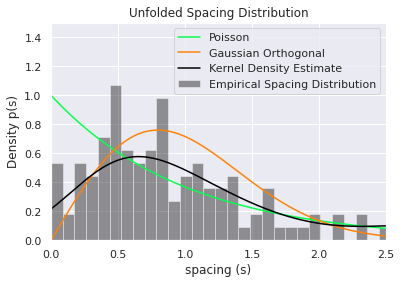

Xsq_poisson 203796644696257.16
Xsq_crit 162.015627915781 at alpha=0.05
shape (114, 114)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


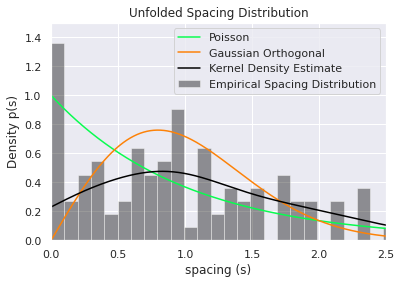

Xsq_poisson 677131792.6662339
Xsq_crit 138.8113625638847 at alpha=0.05
shape (105, 105)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

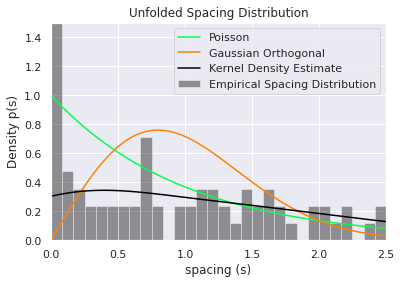

Xsq_poisson (171602941.08715296-4.293764667221835e-10j)
Xsq_crit 128.80390792721767 at alpha=0.05
shape (91, 91)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


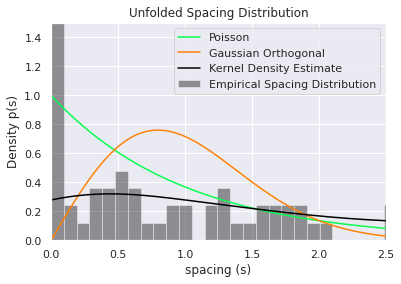

Xsq_poisson 50391888.70986664
Xsq_crit 113.1452701425554 at alpha=0.05
shape (67, 67)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

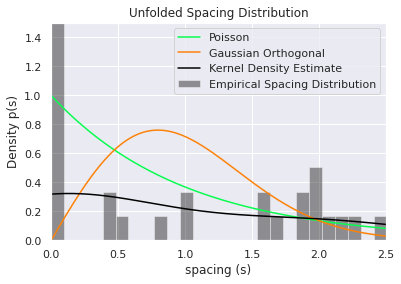

Xsq_poisson (161266473.2398815-2.2346850380066338e-09j)
Xsq_crit 85.96490744123096 at alpha=0.05
shape (43, 43)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


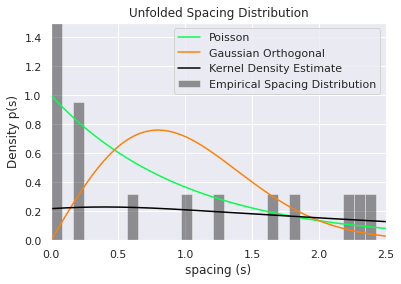

Xsq_poisson 125985187.0810437
Xsq_crit 58.12403768086803 at alpha=0.05


In [39]:
# series C visual inspection
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.30)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.70)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.75)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.80)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.85)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.90)

shape (145, 145)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


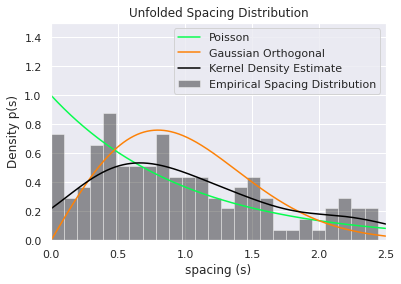

Xsq_poisson 2072875105387206.0
Xsq_crit 173.00405909424495 at alpha=0.05
shape (96, 96)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


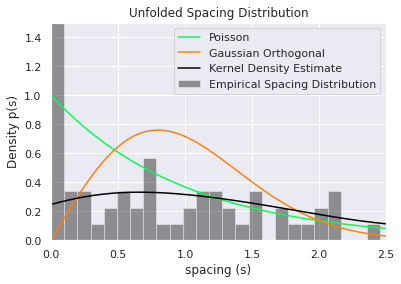

Xsq_poisson 3.0094605675009113e+22
Xsq_crit 118.75161175336736 at alpha=0.05
shape (85, 85)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


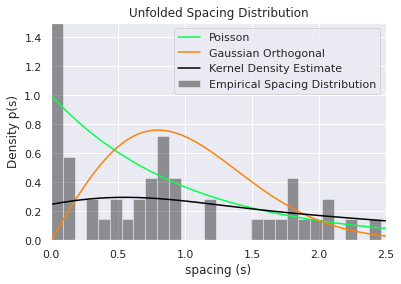

Xsq_poisson 452748223.21481663
Xsq_crit 106.39484024272251 at alpha=0.05
shape (71, 71)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

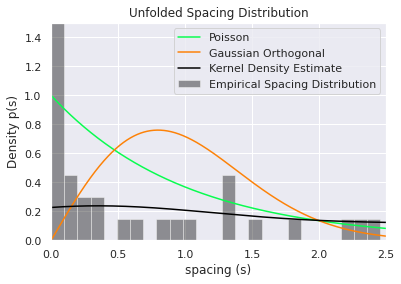

Xsq_poisson (329557234.39785945-9.932275138191725e-09j)
Xsq_crit 90.53122543488065 at alpha=0.05
shape (55, 55)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


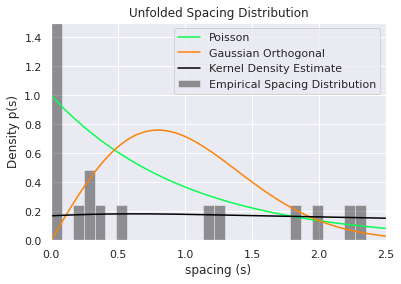

Xsq_poisson 5720517508.269491
Xsq_crit 72.15321616702309 at alpha=0.05
shape (43, 43)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


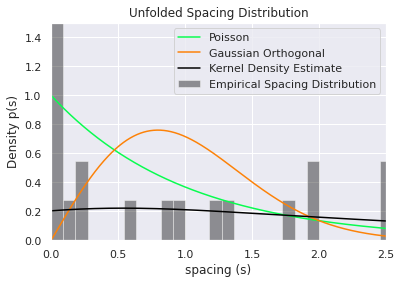

Xsq_poisson 3375265.640859521
Xsq_crit 58.12403768086803 at alpha=0.05


In [40]:
# series G visual inspection
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.30)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.70)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.75)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.80)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.85)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, 0.90)

shape (135, 135)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


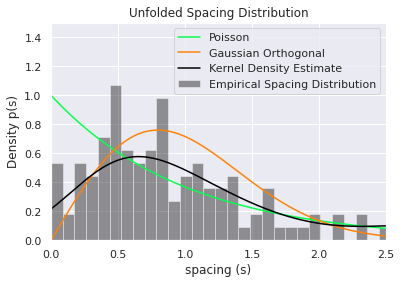

Xsq_poisson 203796644696257.16
Xsq_crit 162.015627915781 at alpha=0.05
shape (114, 114)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


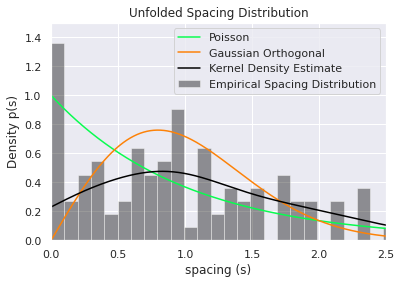

Xsq_poisson 677131792.6662339
Xsq_crit 138.8113625638847 at alpha=0.05
shape (105, 105)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

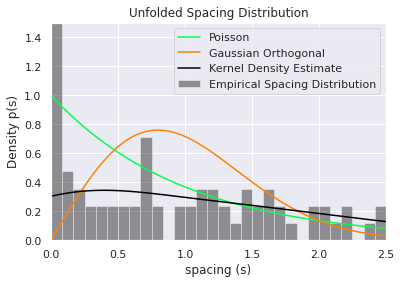

Xsq_poisson (171602941.08715296-4.293764667221835e-10j)
Xsq_crit 128.80390792721767 at alpha=0.05
shape (91, 91)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


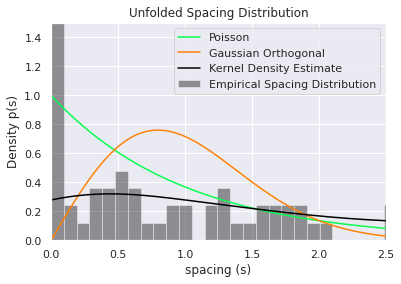

Xsq_poisson 50391888.70986664
Xsq_crit 113.1452701425554 at alpha=0.05
shape (67, 67)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

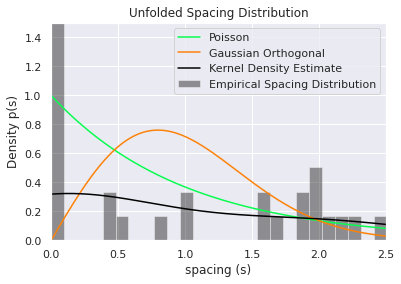

Xsq_poisson (161266473.2398815-2.2346850380066338e-09j)
Xsq_crit 85.96490744123096 at alpha=0.05
shape (43, 43)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


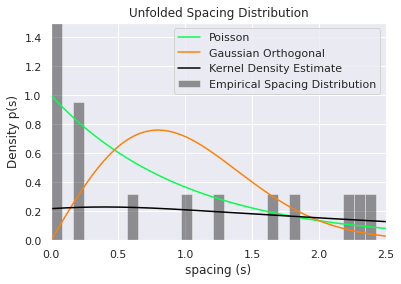

Xsq_poisson 125985187.0810437
Xsq_crit 58.12403768086803 at alpha=0.05


In [41]:
# series C visual inspection
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.30)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.70)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.75)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.80)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.85)
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, 0.90)

shape (105, 105)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/empyricalRMT/_validate.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(array, dtype=float)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

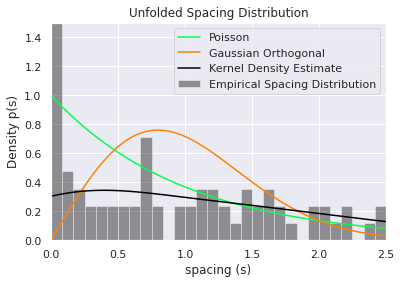

Xsq_poisson (171602941.08715296-4.293764667221835e-10j)
Xsq_crit 128.80390792721767 at alpha=0.05
shape (85, 85)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


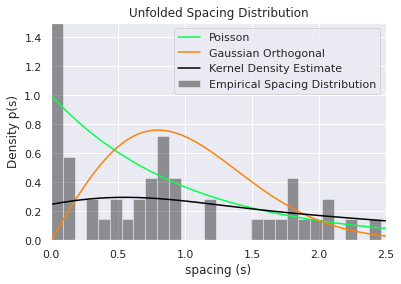

Xsq_poisson 452748223.21481663
Xsq_crit 106.39484024272251 at alpha=0.05
shape (118, 118)


/home/gaher/miniconda3/envs/MBEnv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


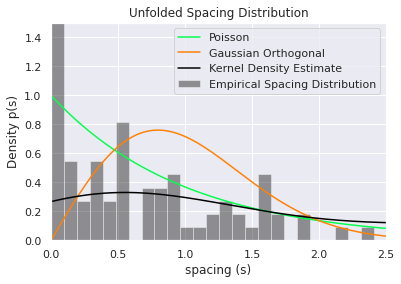

Xsq_poisson 1304972964873927.5
Xsq_crit 143.24614728377486 at alpha=0.05


In [53]:
threshold = 0.75
nat.visualize_RMT_threshold(df_counts_rel_series_C_stan, threshold)
nat.visualize_RMT_threshold(df_counts_rel_series_G_stan, threshold)
nat.visualize_RMT_threshold(df_counts_rel_series_M_stan, threshold)

In [54]:
df_adjm_series_C = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_series_C), threshold)
df_adjm_series_M = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_series_G), threshold)
df_adjm_series_G = nat.get_thresholded_matrix(nat.get_similarity_matrix(df_counts_rel_series_M), threshold)

shape (105, 105)
shape (85, 85)
shape (118, 118)


In [55]:
# save adjacency matrices
df_adjm_series_C.to_csv(f"results/adjm/df_adjm_series_C_{round(threshold*100)}.csv")
df_adjm_series_M.to_csv(f"results/adjm/df_adjm_series_G_{round(threshold*100)}.csv")
df_adjm_series_G.to_csv(f"results/adjm/df_adjm_series_M_{round(threshold*100)}.csv")

## Analyze Network Properties:

### + Community detection with modularity

In [56]:
import network_analysis_properties as nap
import networkx as nx 

In [60]:
# G_series_C = nap.get_network_from_adjm(df_adjm_series_C, name="series_C")
# G_series_G = nap.get_network_from_adjm(df_adjm_series_G, name="series_G")
# G_series_M = nap.get_network_from_adjm(df_adjm_series_M, name="series_M")

# Gs = [G_series_C, G_series_G, G_series_M]

# WARN: SVD did not converge, cannot set module membership
# df_eigen_series_C, df_eigengenes_series_C = nap.get_leading_eigengenes(G_series_C, df_counts_rel_series_C_stan, set_node_module_membership=True)
# df_eigen_series_G, df_eigengenes_series_G = nap.get_leading_eigengenes(G_series_G, df_counts_rel_series_G_stan, set_node_module_membership=True)
# df_eigen_series_M, df_eigengenes_series_M = nap.get_leading_eigengenes(G_series_M, df_counts_rel_series_M_stan, set_node_module_membership=True)

In [61]:
# WARN: SVD did not converge, cannot set module membership
# save module eigenvalues and eigengenes to csv
# df_eigen_series_C.to_csv(f"results/network_module_eig/df_module_eigenvalues_series_C_{round(threshold*100)}.csv")
# df_eigen_series_G.to_csv(f"results/network_module_eig/df_module_eigenvalues_series_G_{round(threshold*100)}.csv")
# df_eigen_series_M.to_csv(f"results/network_module_eig/df_module_eigenvalues_series_M_{round(threshold*100)}.csv")

# df_eigengenes_series_C.to_csv(f"results/network_module_eig/df_module_eigengenes_series_C_{round(threshold*100)}.csv")
# df_eigengenes_series_G.to_csv(f"results/network_module_eig/df_module_eigengenes_series_G_{round(threshold*100)}.csv")
# df_eigengenes_series_M.to_csv(f"results/network_module_eig/df_module_eigengenes_series_M_{round(threshold*100)}.csv") 

In [62]:
# save network properties to csv
nap.networks_attributes_to_csv(Gs, f"results/network/df_network_properties_{round(threshold*100)}.csv")

NameError: name 'Gs' is not defined

In [ ]:
# save node properties to csv
nap.nodes_attributes_to_csv(G_series_C, f"results/network/df_network_series_C_{round(threshold*100)}.csv")
nap.nodes_attributes_to_csv(G_series_G, f"results/network/df_network_series_G_{round(threshold*100)}.csv")
nap.nodes_attributes_to_csv(G_series_M, f"results/network/df_network_series_M_{round(threshold*100)}.csv")

In [ ]:
print("list of node attributes:", set([k for n in G_series_C.nodes for k in G_series_C.nodes[n].keys()]))

attribute = "degree"
nap.display_sorted_property(G_series_C, attribute=attribute)
# nap.display_sorted_property(G_series_G, attribute=attribute)
# nap.display_sorted_property(G_series_M, attribute=attribute)

## Visualize Network

### Default Layout

In [ ]:
for G in Gs:
    nap.visualize_network(G)

### Try Circular Layout

In [ ]:
# for G in Gs:
#     nap.visualize_network(G, layout="circular")

## Fancy Styling

In [ ]:
nap.visualize_network_fancy(G_series_C)

In [ ]:
nap.visualize_network_fancy(G_1G)

In [ ]:
nap.visualize_network_fancy(G_1M)

In [ ]:
nap.visualize_network_fancy(G_2C)

In [ ]:
nap.visualize_network_fancy(G_2G)

In [ ]:
nap.visualize_network_fancy(G_2M)

In [ ]:
nap.visualize_network_fancy(G_3G)

In [ ]:
nap.visualize_network_fancy(G_3M)

## Eigengene Analysis

In [ ]:
df_eigengenes_1C

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)

### Visualize Eigengenes
These are the main patterns of variation across samples

In [ ]:
sns.clustermap(df_eigengenes_1C.T, cmap="coolwarm").fig.suptitle('1C Module Eigengenes') 
sns.clustermap(df_eigengenes_1G.T, cmap="coolwarm").fig.suptitle('1G Module Eigengenes') 
sns.clustermap(df_eigengenes_1M.T, cmap="coolwarm").fig.suptitle('1M Module Eigengenes') 
sns.clustermap(df_eigengenes_2C.T, cmap="coolwarm").fig.suptitle('2C Module Eigengenes') 
sns.clustermap(df_eigengenes_2G.T, cmap="coolwarm").fig.suptitle('2G Module Eigengenes') 
sns.clustermap(df_eigengenes_2M.T, cmap="coolwarm").fig.suptitle('2M Module Eigengenes') 
sns.clustermap(df_eigengenes_3G.T, cmap="coolwarm").fig.suptitle('3G Module Eigengenes') 
sns.clustermap(df_eigengenes_3M.T, cmap="coolwarm").fig.suptitle('3M Module Eigengenes') 